In [1]:
# All the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Loading the data into a dataframe
celeb_df = pd.read_csv('celebrity_deaths_3.csv')
# Display the basic layout                      
celeb_df.head()                       

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score
0,85,1921,natural causes,January,2006,businessman chairman of IBM (1973–1981),Frank Cary,American,6030.0
1,49,1957,murdered,January,2006,musician (House of Freaks Gutterball),Bryan Harvey,American,5867.0
2,64,1942,Alzheimer's disease,January,2006,baseball player (Oakland Athletics),Paul Lindblad,American,6711.0
3,86,1920,Alzheimer's disease,January,2006,politician Representative from Oregon (1957–1...,Charles O. Porter,American,6330.0
4,82,1924,cancer,January,2006,nightclub owner (Tropicana Club),Ofelia Fox,Cuban,4353.0


In [2]:
# Print the basic detials of the dataset

celeb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21438 entries, 0 to 21437
Data columns (total 9 columns):
age               21438 non-null int64
birth_year        21438 non-null int64
cause_of_death    8972 non-null object
death_month       21438 non-null object
death_year        21438 non-null int64
famous_for        21420 non-null object
name              21438 non-null object
nationality       21438 non-null object
fame_score        21380 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.5+ MB


In [3]:
# Noticed that some data is missing in 'cause_of_death', 'famous_for' and 'fame_score'
# Ignoring the columns -> famous_for and fame_score 

cause_of_death_set = set()
for counter in range(len(celeb_df)):
    #print(celeb_df['cause_of_death'][counter])
    cause_of_death_set.add(celeb_df['cause_of_death'][counter])
    
#print(" Different causes of deaths are \n", cause_of_death_set)    
#print("Number of different types of causes of death --> ", len(cause_of_death_set))
#print(celeb_df['cause_of_death'].value_counts())


In [4]:
def group_death_cause(death_cause):
    death_group = ""
    death_cause = str(death_cause)
    #print("items passed" ,death_cause)
    if 'cancer' in death_cause:
        death_group = "Cancer"
       # print("entered cancer")
    elif 'heart' in death_cause or 'cardiac' in death_cause or 'stroke' in death_cause:
        death_group = "Heart Disease"
        #print("entered heart disease")
    elif 'pneumonia' in death_cause:
        death_group = "Pneumonia"
    elif 'shot' in death_cause or 'murdered' in death_cause or 'gunshot' in death_cause:
        death_group = 'Murder'
    elif 'diabetes' in death_cause:
        death_group = "Diabetes"
    elif 'traffic' in death_cause or 'accident' in death_cause:
        death_group = "Accident"
    elif 'suicide' in death_cause:
        death_group = "Suicide"
    else:
        death_group = death_cause
    
    return death_group.strip()
    

In [5]:
celeb_df_grouped_death = celeb_df["cause_of_death"].apply(group_death_cause)

#print(celeb_df_grouped_death.value_counts())

In [6]:
#print(celeb_df['famous_for'].value_counts())

In [7]:
def age_categorizer(age):
    age_category = ""
    if (age < 15):
        age_category = "child"
    elif (age<30):
        age_category = "young"
    elif (age<65) :
        age_category = "adult"
    else:
        age_category = "old"
    return age_category      

agezz = celeb_df['age'].apply(age_categorizer)
#print(agezz.value_counts())                              

In [8]:
def fame_categorizer(profession):
    profession_group = ""
    profession = str(profession)
    if any( ext in profession for ext in ["minister","politician", "political","parliament","secretary"]):
        profession_group = "politician"
    elif "actress" in profession:
        profession_group = "actress"
    elif "actor" in profession:
        profession_group = "actor"
    elif "singer" in profession:
        profession_group = "singer"
    elif "football" in profession or "footballer" in profession:
        profession_group = "football player"
    elif "baseball" in profession:
        profession_group = "baseball player"
    elif "player" in profession:
        profession_group = "athelete"
    else:
        profession_group = profession
    return profession_group.strip().lower()

proffess = celeb_df['famous_for'].apply(fame_categorizer)

#print(proffess.value_counts())

In [9]:
# Cleaning the Data
celeb_stats = celeb_df.copy()
celeb_stats = celeb_stats.drop(celeb_stats[celeb_stats["age"] == 0 ].index) # only 1 value though
# Fill in blank values in death causes
celeb_stats["cause_of_death"].fillna("unknown",inplace=True)
celeb_stats["cause_of_death"] = celeb_stats.apply (lambda row:group_death_cause(row["cause_of_death"]) , axis = 1)
celeb_stats["age_category"] = celeb_stats.apply (lambda row: age_categorizer(row["age"]),axis=1)
celeb_stats["famous_for"] = celeb_stats.apply(lambda row: fame_categorizer(row["famous_for"]), axis=1)
celeb_stats.fame_score = celeb_stats.fame_score.fillna(0)

# Categorizing deaths in 2016 and else where
death_2016 = celeb_stats[celeb_stats.death_year == 2016]
death_rest_2016 = celeb_stats[celeb_stats.death_year != 2016]

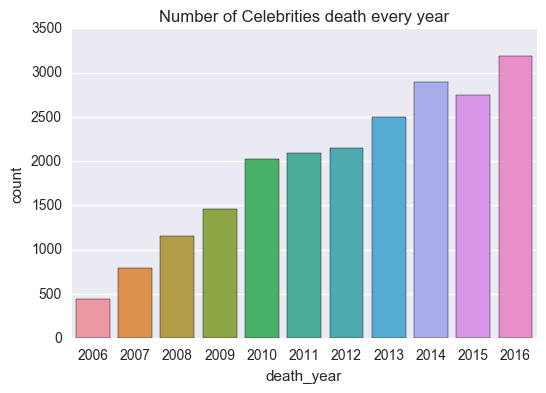

In [10]:
%matplotlib inline

sns.countplot(celeb_stats.death_year)
plt.title("Number of Celebrities death every year")

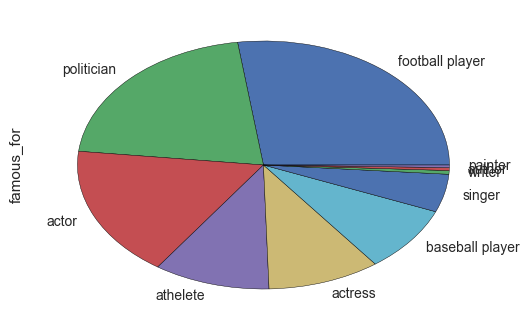

In [11]:
# Plot the top 10 professions with the maximum deaths
famous_value_counts = celeb_stats.famous_for.value_counts()
famous_value_counts.iloc[0:10].plot(kind = 'pie')

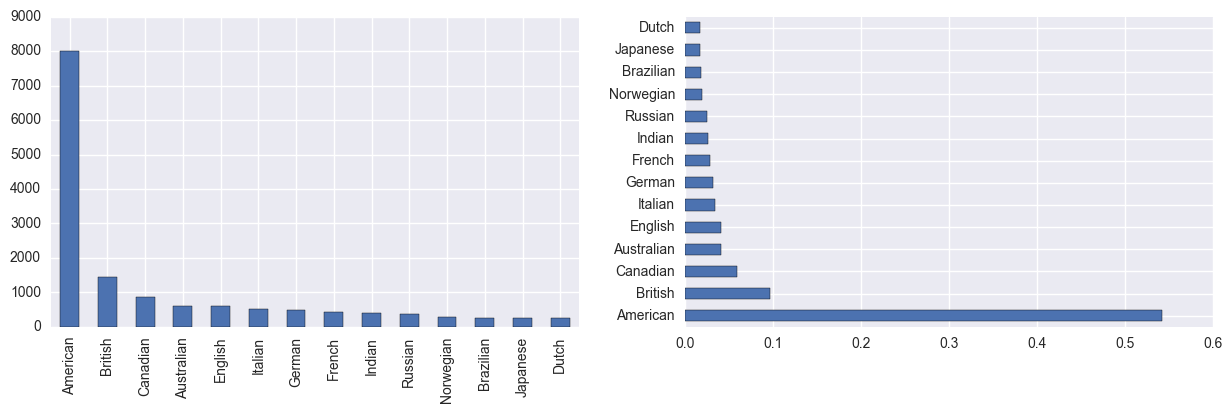

In [12]:
# celeb_stats.head()

fig, (axis1, axis2) = plt.subplots(1, 2, figsize= [15,4])
celeb_stats.nationality.value_counts().head(14).plot(kind = 'bar', ax=axis1)

celeb_stats_nationality_top15 = celeb_stats.nationality.value_counts().head(14)
celeb_stats_nationality_top15 = celeb_stats_nationality_top15.astype(float, inplace= True)

total_sum = celeb_stats_nationality_top15.sum()

for i in range(14):
    celeb_stats_nationality_top15[i] = celeb_stats_nationality_top15[i]/total_sum

celeb_stats_nationality_top15.plot(kind='barh', ax=axis2)

In [13]:
celeb_stats.head()

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score,age_category
0,85,1921,natural causes,January,2006,businessman chairman of ibm (1973–1981),Frank Cary,American,6030.0,old
1,49,1957,Murder,January,2006,musician (house of freaks gutterball),Bryan Harvey,American,5867.0,adult
2,64,1942,Alzheimer's disease,January,2006,baseball player,Paul Lindblad,American,6711.0,adult
3,86,1920,Alzheimer's disease,January,2006,politician,Charles O. Porter,American,6330.0,old
4,82,1924,Cancer,January,2006,nightclub owner (tropicana club),Ofelia Fox,Cuban,4353.0,old


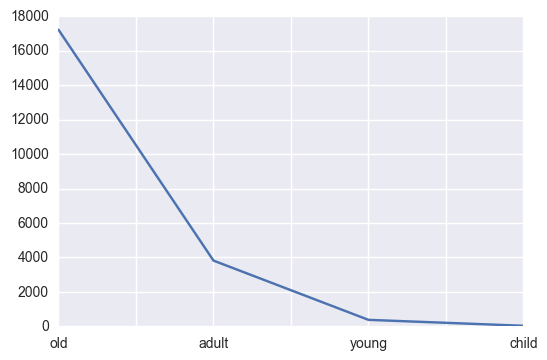

In [14]:
celeb_stats.age_category.value_counts().plot()

In [15]:
count_old = 0
count_young = 0

for value in celeb_stats.age_category:
    if value == 'old':
        count_old +=1
    elif value == 'young':
        count_young +=1

        
print(count_old)
print(count_young)
    

17221
373


In [16]:
# Observation so far:
# Gradual increase in deaths on basis of year -> Nothing significant in 2016
# High % deaths in America
# professions like Football, Actor, Actress, Baseball most affected by it
# Cancer is the number 1 cause of this
# Most of the people died in old age, so no significant observation